<link href="https://fonts.googleapis.com/css2?family=Montserrat:wght@100..900&display=swap" rel="stylesheet">

<h1 style="font-family: 'Montserrat', sans-serif; font-size:40px; color:#01753a; text-align: center;">
    Understanding the Relationship between Corn Expansion and Deforestation
</h1>
<p style="font-family: 'Trebuchet', sans-serif; font-size:12px;text-align:right"> December 2024 </p>
<hr>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;">Nadège Baertschi, Zélia Décaillet, Simon Dutruy, Mert Ülgüner</p>

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Lifecycle_study.png" alt="Structure of the article" width="1000">

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">To guide you through our research, we’ve structured the study like the growth of a tree, as shown above. Each stage represents a key step in our journey. We've also created this table of content to help you navigate: </p>

# Table of Content
1. [Why does this study matter? Our hypothesis](#1-Watering-the-Soil)
2. [What is the data we are working with?](#2-Planting-the-Seed)
3. [Initial insights : what does the data reveal?](#3-Breaking-Ground)
4. [Building the statistical model](#4-Growing-the-Shoot)
5. [How robust is the model? Tackling endogeneity](#5-Strengthening-the-Trunk)
6. [How uniform is the relationship across our database? Tackling heterogeneity](#6-Branching-Out)
7. [Discussion: How should we interpret our results?](#7-Growing-the-Foliage)
8. [What are the limitations of our study and its potential extensions?](#8-Reaching-the-Canopy)
9. [Appendix](#Appendix)

# 1 Watering the Soil
[Click here to go back to the table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section1.png" alt="Structure of the article" width="150">

## Why does this study matter? 🧐

<div style="background-color: #deefbb;color:#000000; padding: 10px; text-align:center;border-radius: 5px;font-family: 'Trebuchet', bold, sans-serif; font-size:14px;">
    <b>Did you know that the annual rate of deforestation in 2022 was equivalent to deforesting 15 football (soccer) fields per minute? </b> <p style="font-family: 'Trebuchet', sans-serif; font-size:12px;text-align:right">(State of climate action 2023)</p>
</div>
 
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> When we talk about climate change, forests often come up as both part of the solution and part of the problem. Known as “carbon sinks,” they play a crucial role in absorbing and storing carbon dioxide, which helps regulate the planet’s atmosphere. Beyond their environmental importance, forests are also home to an incredible variety of life. But when forests are destroyed, the carbon they store is released back into the air, and this contributes to global emissions. <b>Each year, forest loss releases nearly 5 billion tons of carbon dioxide</b>, which is equivalent to around 10% of all human-caused emissions (Gibbs et al., 2018). </p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Deforestation is, therefore, a double-edged sword in our fight against climate change. Not only does it reduce the ability of forests to absorb greenhouse gases, but it also becomes a direct source of emissions, speeding up global warming. <b>So, what’s causing this destruction?</b> </p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> You can see in <b>Figure 1</b> how we’ve come to the hypothesis that <b>corn expansion might be one of the causes</b>. While other agricultural activities, such as meat and palm oil production, are widely recognized as major drivers of deforestation, we chose to focus on corn. This decision stems from a growing awareness of the environmental impact of palm oil and a cultural shift, particularly among younger generations, away from meat and animal-based products (Salehi et al., 2023). As attention turns away from these commodities, we believe cereals could become increasingly prevalent in the future, particularly corn, due to its versatility and demand across food, biofuels, and animal feed. </p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> In this study, we aim to test our hypothesis by addressing the central research question: <b>Could corn expansion lead to deforestation?</b> To answer this, we will analyze data and apply <b>statistical methods</b> to uncover the relationship between corn expansion and forest loss. By doing so, we hope to determine not just if a link exists, but whether there is a <b>causal relationship</b> driving this trend. </p>

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Figure_1.png" alt="Hypothesis" width="800">

# 2 Planting the Seed
[Click here to go back to the table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section2.png" alt="Structure of the article" width="150">

## What is the data that we are working with? 🗃️

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Before jumping into the beautiful realm of statistics, we must gather and understand the data that we need. </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> In this study, our two key numbers, or variables, are: <b>the size of cornfields and the size of forests</b>, both measured in square kilometers, as we aim to estimate how much a change in the size of cornfields relates to a change in the size of forests.  </p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> However, we also need to consider other factors—called control variables—to ensure we’re isolating the specific impact of corn expansion on deforestation. These controls help us account for other influences that might affect the relationship, so we can focus on the role corn plays more accurately. Throughout our analysis, we will use three existing research papers, Curtis et al. (2018), Harris et al. (2021), and Bager et al. (2023),  to help us identify the other variables and construct our statistical model. They all highlight the central role of agriculture in their exploration of deforestation drivers. From them, we decided to include: </p>
<ul> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> GDP:</b> Wealthier countries with higher GDP may exhibit increased deforestation due to higher demand for agricultural commodities and infrastructure development (Bager et al., 2023).</li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Temperature: </b> It plays a critical role in deforestation through its impact on crop yields and land suitability, potentially incentivizing agricultural expansion into forested areas (Bager et al., 2023). </li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Cattle farming: </b> Corn has an important role as a feed crop, particularly for non-meat-producing animals like dairy cattle. As corn is a primary component of cattle feed, especially in milk production, its cultivation may indirectly influence forest conversion to arable land. This link is emphasized by Curtis et al. (2018) and Harris et al. (2021), highlighting the indirect pressures of livestock farming on deforestation through crop demand. </li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Suitable Land Available for Corn Expansion Other Than Forests: </b>This variable serves as a proxy for the proximity between cornfields and forests, reflecting whether agricultural expansion is likely to target forested areas or shift to other available lands. Countries with plenty of non-forested but usable land may reduce the pressure to clear forests for new crops. On the other hand, a lack of suitable alternatives could increase the likelihood of forests being converted into cornfields (Foley et al., 2011; Gibbs et al., 2010). This means we might observe a stronger relationship for these countries.  </li> </ul>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;color:red"> All our variables and their relationship are summarized in this figure below: </p>
<b>to be included</b>

### Database

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">  We built our dataset relying on two reliable sources: <ul> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <a href="https://www.fao.org/faostat/" target="_blank">FAO Database</a>: Provides detailed statistics on global agricultural production and land coverage, including data on cornfield areas and forest areas. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <a href="https://www.qog.pol.gu.se/" target="_blank">QoG Institute Database</a>: Offers governance-related indicators, such as the corruption index, GDP, and rural population. </li> </ul> <p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">Our dataset spans <b>64 countries</b> across five continents, and covers the years <b>2000 to 2021</b>.  </p>

In [1]:
# Importing the libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import pycountry
import plotly.express as px
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf  # For statistical modeling using R-style formulas
from linearmodels.panel import PanelOLS
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing our pre-built clean database
url = 'https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Database.csv'
df = pd.read_csv(url)
df.drop(columns='Unnamed: 0',inplace=True)
df

,country,iso3,year,corn,forest,suitability,Average_Temperature,gdp,cattle,sqrtforest,sqrtcorn,sqrtgdp,sqrtsuit,cattleM,forestM
0,Afghanistan,AFG,2000.0,960.00,12281.1,31149.29,12.586175,3531.869351,700000.0,110.820125,30.983867,59.429533,176.491615,700.000,12.2811
1,Afghanistan,AFG,2001.0,800.00,11975.3,31149.29,13.413867,3620.525250,600000.0,109.431714,28.284271,60.170801,176.491615,600.000,11.9753
2,Afghanistan,AFG,2002.0,1000.00,11851.1,31149.29,13.051083,4285.191376,833000.0,108.862758,31.622777,65.461373,176.491615,833.000,11.8511
3,Afghanistan,AFG,2003.0,2500.00,11735.3,31149.29,12.485457,4898.791114,761000.0,108.329590,50.000000,69.991365,176.491615,761.000,11.7353
4,Afghanistan,AFG,2004.0,2500.00,11667.1,31149.29,13.233360,5504.073142,829000.0,108.014351,50.000000,74.189441,176.491615,829.000,11.6671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,Zambia,ZMB,2017.0,14339.44,473443.9,16982.08,21.990675,25895.263867,1300000.0,688.072598,119.747401,160.920054,130.315310,1300.000,473.4439
1690,Zambia,ZMB,2018.0,10860.06,473059.8,16982.08,22.302766,26311.984274,1128763.0,687.793428,104.211612,162.209692,130.315310,1128.763,473.0598
1691,Zambia,ZMB,2019.0,8416.93,471995.7,16982.08,22.617600,23310.346721,1163320.0,687.019432,91.743828,152.677263,130.315310,1163.320,471.9957
1692,Zambia,ZMB,2020.0,13335.19,471548.3,16982.08,22.167939,18063.780790,1107495.0,686.693745,115.478093,134.401565,130.315310,1107.495,471.5483


### Key considerations

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> We're now almost ready to start the construction of our model. But before engaging ourselves into this next step, it is first important to aknowledge the potential biases and weaknesses of the data we are working with. </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> What you need to know: </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <ul> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> Data transformation:</b> When we looked at our database, we noticed that it is heavily skewed—most values are clustered on one side of the scale, with a few extreme values stretching far away from the rest. This skewness can make our analysis unreliable because those extreme values might overly influence the results. To address this, we applied a square root transformation to our variable of interest, cornfield area (in sq km). This transformation helps reduce the impact of outliers while maintaining the overall structure of the data. Now, we’re examining how changes in the square root of cornfield area relate to changes in forest area. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Geographic Coverage and its bias: </b>
Our dataset heavily represents tropical regions in Africa, Asia, and Latin America, where deforestation due to agricultural expansion is most pronounced. While this focus is crucial for understanding the issue in areas with significant forest loss, it introduces a bias that could overestimate the global relationship between corn expansion and deforestation. Temperate and industrialized regions, like parts of Europe and North America, where forest cover is stable or increasing, are less represented. This imbalance means our results may reflect stronger impacts than what might be observed in regions with different land-use dynamics.</li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Imperfect or omitted control variables: Are we missing something?</b>
The relationship between corn expansion and deforestation is shaped by numerous factors.  While we’ve included key control variables, we might still miss some others, because they are hard to measure or lack data. For instance, anti-deforestation policies could be an omitted variable. Given that these policies directly impact how land-use decisions are made, potentially reducing the likelihood of forests being converted into cornfields, we might overestimate the effect of corn expansion on deforestation as we don't include them. Moreover, we use non-forested suitable land available for corn expansion as a proxy for the proximity between cornfields and forests, however it is imperfect as it lacks spatial precision, and doesn’t account for accessibility. As a result, it could bias our results in either direction: overestimating the impact of corn expansion if it underrepresents alternative land availability, or underestimating it if it overrepresents the suitability of non-forested land.</li> </ul>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> We describe and discuss the limitations of our data, and therefore of our analysis, in more details later in <a href="#Limitations-of-our-data-and-the-choice-of-our-variables">Section 8</a>. </p>

# 3 Breaking Ground
[Click here to go back to the table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section3.png" alt="Structure of the article" width="150">

## Initial insights : what does our data reveal? 🔍

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">  Let's look at our data and what it initially reveals, so we can have an idea if our hypothesis has a chance to be valid. </p>

### How did global forest area change over time?

<Axes: title={'center': 'Figure 2: Forest area (sq km) over time'}, xlabel='Year', ylabel='Forest area (sq km)'>

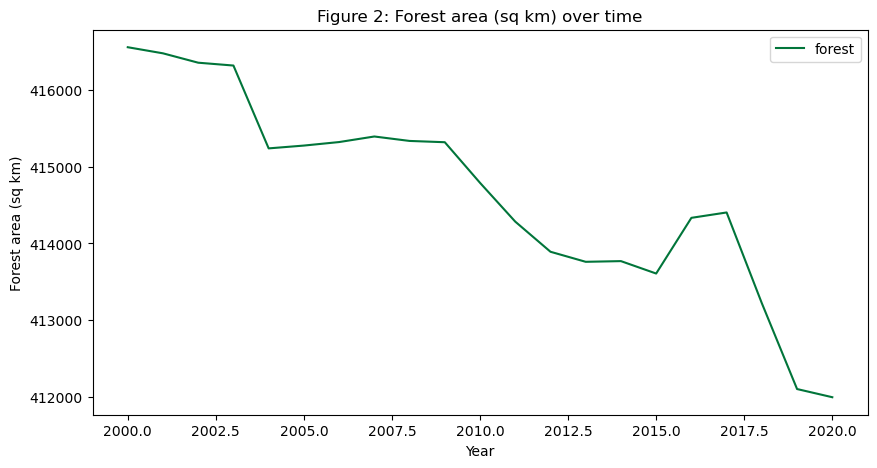

In [23]:
# Lineplot to highlight the trend of forest area
forests = df.groupby(by='year')['forest'].mean().reset_index()
forests.plot.line(x='year',y='forest',color='#01753a', title='Figure 2: Forest area (sq km) over time', xlabel='Year',ylabel='Forest area (sq km)',figsize=(10,5))

### How did global cornfield area change over time?

<Axes: title={'center': 'Figure 3: Cornfield area (sq km) over time'}, xlabel='Year', ylabel='Cornfield area (sq km)'>

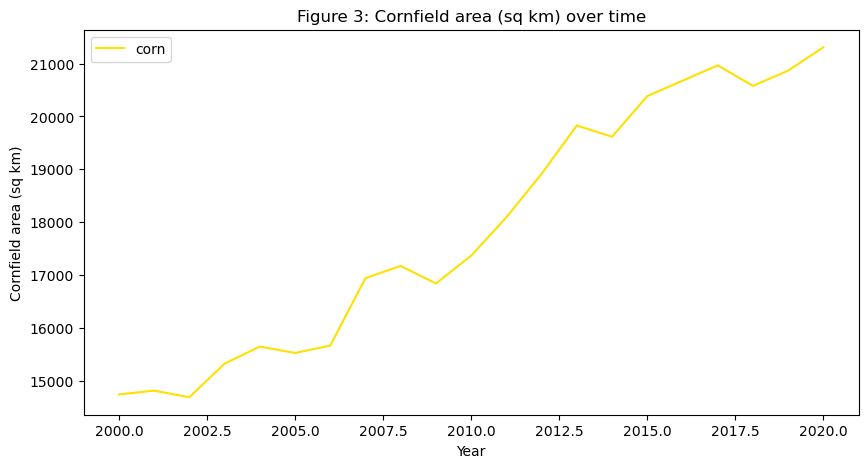

In [24]:
# Lineplot to highlight the trend of cornfield area
corn_area = df.groupby(by='year')['corn'].mean().reset_index()
corn_area.plot.line(x='year',y='corn',color='#ffe000', title='Figure 3: Cornfield area (sq km) over time', xlabel='Year',ylabel='Cornfield area (sq km)',figsize=(10,5))

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> These two figures reveal a clear pattern: as forest areas have decreased over time, cornfield areas have grown. This suggests a potential link between the two, aligning with our hypothesis that corn expansion might be contributing to forest loss. While this doesn’t prove causation, it’s enough to prompt a closer look. Let’s see the actual correlation between these two variables. </p>

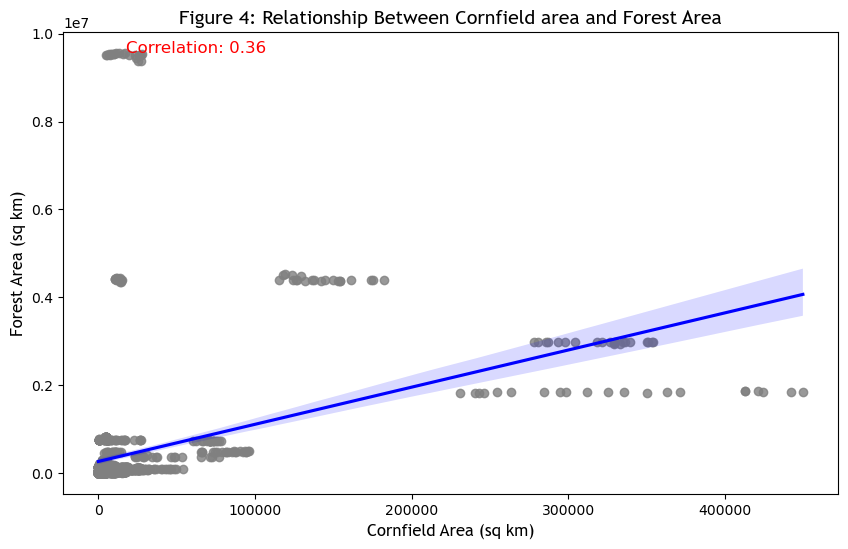

0.00


In [25]:
# Correlation coefficient
corr, p_value = pearsonr(df['corn'], df['forest'])
# Regression line for the correlation between the two key variables
plt.figure(figsize=(10, 6))
sns.regplot(x='corn',
            y='forest',
            data=df,
            scatter_kws={'color': 'grey'},
            line_kws={'color': 'blue'})
# Labels
plt.xlabel("Cornfield Area (sq km)", fontdict={'fontsize': 12, 'fontname': 'Trebuchet MS'})
plt.ylabel("Forest Area (sq km)", fontdict={'fontsize': 12, 'fontname': 'Trebuchet MS'})
plt.title("Figure 4: Relationship Between Cornfield area and Forest Area", fontdict={'fontsize': 14, 'fontname': 'Trebuchet MS'})
# Add the correlation coefficient to the plot
plt.text(x=df['corn'].mean(),  # x-coordinate (adjust as needed)
         y=df['forest'].max(),  # y-coordinate (adjust as needed)
         s=f'Correlation: {corr:.2f}',  # Text to display
         fontsize=12, color='red')

# Show the plot
plt.show()
print(f"{p_value:.2f}")

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">The correlation coefficient of 0.36 between cornfield area and forest area presents an unexpected result. Instead of a negative relationship supporting our hypothesis—that corn expansion drives deforestation—we see a moderate positive correlation. This could suggest that cornfields and forests are often concentrated in the same regions, such as tropical areas, where both land types coexist. Alternatively, it raises a critical question: could our hypothesis be invalid? Perhaps corn expansion isn’t a primary driver of forest loss after all.</p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> This outcome may be influenced by confounding factors—variables that affect both cornfield area and forest area, potentially obscuring the true relationship. If these confounders aren’t properly accounted for, they could distort our understanding of the connection between corn expansion and deforestation. This leads us to our next stage, where we move beyond correlation and use causal methods that include them. Let’s proceed to test the true relationship between corn expansion and deforestation more rigorously.</p>

# 4 Growing the Shoot
[Click here to go back to the table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section4.png" alt="Structure of the article" width="150">

## Building our statistical model 📈

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">Now comes the real deal: statistics. We’ll use a method called Ordinary Least Squares (OLS) regression. Think of it as a tool that helps us quantify the relationship between two variables—in this case, cornfield area and forest area—while accounting for other factors that might influence this relationship. By including these additional variables, OLS allows us to isolate the effect of corn expansion, giving us a clearer picture of whether it’s playing a role in forest loss. The results of this analysis won’t just help us test our hypothesis; they’ll provide valuable insights into how agricultural practices impact forests, guiding policies and land management decisions to address deforestation more effectively. It’s like peeling back the layers to find the core of the issue.</p>

### OLS with control variables and fixed effects (Our baseline model)

$$
\Large {\text{Forest}_{it}} = \beta_0 + \beta_1 \sqrt{\text{Corn}_{it}} + \beta_2^\prime X_{it} + \text{FE}_i + \epsilon_{it}
$$

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The terms in our OLS model are:</p>
<ul> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
    <b> Forest<sub>it</sub>:</b> This is our dependent variable. It refers to forest area in square kilometers in country i and year t </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> β<sub>0</sub>:</b> The intercept term. It represents the expected value of Forest<sub>it</sub> when all other variables are zero. Essentially, it captures the baseline forest area when no other factors are at play. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> β<sub>1</sub>:</b> The coefficient β<sub>1</sub> measures the effect of the square root of cornfield area (Corn<sub>it</sub>) on Forest<sub>it</sub>. A negative β<sub>1</sub> would suggest that an increase in cornfield area corresponds to a decrease in forest area, supporting the hypothesis that corn expansion comes at the expense of forests. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> √Corn<sub>it</sub>:</b> This is our variable of interest, the independent variable. It represents the square root of cornfield area in country i and year t. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> β<sub>2</sub>′X<sub>it</sub>:</b> This accounts for the effects of control variables such as GDP, Temperature, and Cattle, which may also influence forest area. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> FE<sub>i</sub>:</b> The country-specific fixed effect. This accounts for unobserved, time-invariant characteristics of country i that may influence forest area. For example, these fixed effects can capture geography, cultural and historical factors, and demographic.  It helps control for differences across countries that do not change over time. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> ε<sub>it</sub>:</b> The error term. This captures all other unobserved factors influencing forest area for country <em>i</em> in year <em>t</em>. </li> </ul>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Let's look at our results !  

In [19]:
# No controls model
est_fe_canned = PanelOLS.from_formula("forestM ~ 1 + sqrtcorn",
                            data=df.set_index(["country", "year"]))
slr = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

slr_resid = slr.resids
slr_fit = slr.fitted_values
slr_cov = slr.cov

#print(slr.summary)

In [20]:
# All controls model
est_fe_canned = PanelOLS.from_formula("forestM ~ 1 + sqrtcorn + sqrtgdp + Average_Temperature + cattleM",
                            data=df.set_index(["country", "year"]))
mlr = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

mlr_resid = mlr.resids
mlr_fit = mlr.fitted_values
mlr_cov = mlr.cov

#print(mlr.summary)

In [22]:
# All controls + country-specific fixed effects
est_fe_canned = PanelOLS.from_formula("forest ~ 1 + sqrtcorn + sqrtgdp + Average_Temperature + cattleM + EntityEffects",
                            data=df.set_index(["country", "year"]))
baseline = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

fei_resid = baseline.resids
fei_fit = baseline.fitted_values
fei_cov = baseline.cov

#print(baseline.summary)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Table_1.png" alt="Table 1" width="800">

### Results of our baseline model

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
We tested how corn expansion affects forest area using three versions of our model: a simple one without controls, one with controls (like GDP, temperature, and cattle farming), and one that also includes country-specific fixed effects.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
In the simple model (no controls), the corn coefficient was large and positive, suggesting that corn expansion might be linked to more forest area. However, this result is likely misleading because it doesn’t account for other factors that influence both corn expansion and forest loss, like economic activity or livestock farming.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Once we added controls like GDP, temperature, and cattle farming, the relationship between corn expansion and forest area became small, negative, and statistically insignificant. This means that once we accounted for these factors, corn expansion alone no longer seemed to have much of an impact on forests.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Finally, when we introduced country-specific fixed effects—which control for unobserved, time-invariant differences between countries (like geography or policies)—the corn coefficient turned very negative but remained statistically insignificant. Fixed effects help us focus only on changes within each country over time, making the analysis more precise. However, the results suggest that the remaining relationship between corn and forest loss is weak and uncertain.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Interestingly, while the fixed effects model improved the reliability of our results, the R-squared value dropped. R-squared measures how much of the variation in forest area the model can explain. Adding fixed effects removes variation between countries, so the overall explanatory power of the model decreases, even though it becomes more robust.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
In short, our results show that the relationship between corn expansion and forest loss weakens significantly when we account for other factors and country-specific characteristics. While the initial positive link disappears, the fixed effects model hints at a potential negative relationship that remains uncertain and requires further investigation.

### Should we add time-specific fixed effects?

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Technological progress has significantly influenced corn production efficiency over the years. <a href="https://doi.org/10.1371/journal.pone.0254423"> Wang and Hu (2021)</a>, while analyzing corn production from 2012 to 2019, found that technological advancements improved production efficiency, with technical efficiency stabilizing above 90% by 2015.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
By including time fixed effects, we can better account for such industry-wide changes that occur over time but are consistent across countries, ensuring a more accurate assessment of the relationship between corn expansion and deforestation.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> 
This means that adding time fixed effects can allow us to control for temporal factors like technological advancements, leading to a more precise understanding of how corn expansion impacts forest areas.

# 5 Strengthening the Trunk
[Click here to go back to the table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section5.png" alt="Structure of the article" width="130">

## How robust is the model? Tackling endogeneity 🦾

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> We’ve run our panel OLS regression and drawn initial conclusions, but how confident can we be that corn expansion is truly driving deforestation? This brings us to the problem of endogeneity, where bias creeps into our model because of  reverse causality. Reverse causality means the relationship might run the other way—what if deforestation, by opening up land, is actually driving corn expansion instead? </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> To address this issue, we’ll introduce a technique called lagging our independent variable. By using the value of the square root of cornfield area from the previous year instead of the current year, we can reduce the risk of reverse causality. This approach ensures that any observed changes in forest area are more likely to follow from corn expansion rather than the other way around. Lagging allows us to capture the delayed effects of agricultural expansion on forests, making our analysis more robust and closer to identifying the true causal relationship.</p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> It means that now our regression model is:</p>

$$
\Large {\text{Forest}_{it}} = \beta_0 + \beta_1 \sqrt{\text{Corn}_{i(t-1)}} + \beta_2^\prime X_{it} + \text{FE}_i + \text{FE}_t + \epsilon_{it}
$$

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">Let’s see how this adjustment strengthens our results!

In [8]:
fe_time_effects = PanelOLS.from_formula("forest ~ 1 + sqrtcorn + sqrtgdp + Average_Temperature + cattleM + EntityEffects + TimeEffects",
                            data=df.set_index(["country", "year"]))
timeFE = fe_time_effects.fit(cov_type='clustered', cluster_entity=True)

fet_resid = timeFE.resids
fet_fit = timeFE.fitted_values
fet_cov = timeFE.cov

print(timeFE.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0182
Estimator:                   PanelOLS   R-squared (Between):             -0.0066
No. Observations:                1694   R-squared (Within):               0.0317
Date:                Wed, Dec 18 2024   R-squared (Overall):             -0.0066
Time:                        10:42:04   Log-likelihood                -1.793e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7.3695
Entities:                          77   P-value                           0.0000
Avg Obs:                       22.000   Distribution:                  F(4,1592)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             0.2942
                            

In [9]:
# Create the lagged variable for logcorn within each country
df['sqrtcorn_lag1'] = df.groupby('country', observed=True)['sqrtcorn'].shift(-1)

# Drop 2021 rows
df.dropna(inplace=True)
df.head(22)

est_fe_canned = PanelOLS.from_formula("forest ~ 1 + sqrtcorn_lag1 + sqrtgdp + Average_Temperature + cattleM + EntityEffects + TimeEffects",
                            data=df.set_index(["country", "year"]))
lagFE = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

felag_resid = lagFE.resids
felag_fit = lagFE.fitted_values
felag_cov = lagFE.cov

print(lagFE.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0306
Estimator:                   PanelOLS   R-squared (Between):             -0.0100
No. Observations:                1617   R-squared (Within):               0.0456
Date:                Wed, Dec 18 2024   R-squared (Overall):             -0.0100
Time:                        10:42:04   Log-likelihood                  -1.7e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.973
Entities:                          77   P-value                           0.0000
Avg Obs:                       21.000   Distribution:                  F(4,1516)
Min Obs:                       21.000                                           
Max Obs:                       21.000   F-statistic (robust):             0.4251
                            

In [10]:
df=df.dropna()
df.isnull().sum()
print(len(df['country'].unique()))

77


<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The results from this new model ... </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> This refined model takes us closer to identifying a causal relationship between corn expansion and forest loss. To build on this, we’ll explore how the availability of non-forested land might amplify or mitigate this effect, helping us understand where and why corn expansion has the most significant impact on forests. </p>

# 6 Branching Out
[Click here to go back to the table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section6.png" alt="Structure of the article" width="125">

## How uniform is the relationship across our database? Tackling heterogeneity 🔁

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> So far, we’ve assumed that the relationship between corn expansion and deforestation is consistent across all countries in our dataset. But is that really the case? Some regions might feel this pressure more acutely than others, depending on the availability of non-forested land for agricultural expansion. For instance, in countries where little suitable land is available for corn expansion, forests may be the only option, potentially leading to a stronger relationship between corn expansion and deforestation.</p> 

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
This is another critical aspect of causality that we need to address. If the relationship varies significantly based on land availability, it could indicate that deforestation is context-dependent rather than a universal outcome of corn expansion. The country-specific fixed effects that are included in our baseline model cannot address this issue alone. This is why we’ll analyze the heterogeneity in our results by using a variable that we described earlier in this study: suitable land available for corn expansion other than forests. This serves as a proxy for the constraints countries face when expanding their agricultural land. While an ideal measure would be the exact proximity between cornfields and forests, but like we said previously, this is difficult to quantify. Nevertheless, our proxy still allows us to test whether the relationship between corn expansion and deforestation is stronger in places where forests are the primary land available for new crops. Let’s dive in to see if this pattern holds!  </p>

In [11]:
# Create the dummy variable
df['hetero']= df['suitability'].apply(lambda val: 1 if (val>df['suitability'].median()) else 0)

# Create the interaction term between the dummy variable and the square root of cornfield area
df['hetero_x_sqrtcorn'] = df['sqrtcorn']*df['hetero']

# Create the regression 
est_fe_canned = PanelOLS.from_formula("forestM ~ 1 + sqrtcorn_lag1 + sqrtgdp + Average_Temperature + cattleM + hetero_x_sqrtcorn + EntityEffects + TimeEffects",
                            data=df.set_index(["country", "year"]))
feLagHetero = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

felaghetero_resid = feLagHetero.resids
felaghetero_fit = feLagHetero.fitted_values
felaghetero_cov = feLagHetero.cov

print(feLagHetero.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                forestM   R-squared:                        0.0315
Estimator:                   PanelOLS   R-squared (Between):             -0.0110
No. Observations:                1617   R-squared (Within):               0.0463
Date:                Wed, Dec 18 2024   R-squared (Overall):             -0.0110
Time:                        10:42:04   Log-likelihood                   -5827.0
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      9.8392
Entities:                          77   P-value                           0.0000
Avg Obs:                       21.000   Distribution:                  F(5,1515)
Min Obs:                       21.000                                           
Max Obs:                       21.000   F-statistic (robust):             0.5241
                            

# 7 Growing the Foliage
[Click here to go back to the table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section7.png" alt="Structure of the article" width="125">

## Discussion : How should we interpret our results? 🕵️

# 8 Reaching the Canopy 
[Click here to go back to the table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section8.png" alt="Structure of the article" width="125">

## What are the limitations of our study and its potential extensions? 📝🧩

### Limitations of our data and the choice of our variables

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> As we made it clear in Section 3, the relationship between corn expansion and deforestation is complex and shaped by many factors. Therefore it is challenging to determine which ones to include in order to build the right statistical model. We initially tested several variables beyond GDP, temperature, and cattle farming—such as rainfall, rural population, corn prices, and suitable land available for corn expansion other than forests— but we found their impact on deforestation to be negligible. Their regression coefficients were close to zero, meaning they had little to no influence. Moreover, removing them didn’t change the effects of the retained variables on deforestation, so we decided to exclude them from our final model. </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> But still, no model is perfect. There’s always the possibility of omitted variable bias, like the one we described in our <a href="#Key-considerations"> key considerations</a> in Section 3, which is about the non-inclusion of anti-deforestation policies. There is also the bias that we might have with our imeperfect heterogeneity variable. </p>

# Appendix